# Numerical Analysis 2017 Fall - Assignment 3

### Group 12 - 김명혁 & 조영우
### 2017.11.14

In [1]:
import sys
import scipy as sp
import numpy as np
import sympy as sym
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline
from scipy.interpolate import BarycentricInterpolator

%matplotlib inline
sym.init_printing()

#plt.rc('text', usetex = True)
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.size"] = "15"

print('python version : ', sys.version)
print('numpy version : ', np.version.version)
print('sympy version : ', sym.__version__)
print('scipy version : ', sp.__version__)
print('matplotlib version :', mpl.__version__)

python version :  3.6.2 |Anaconda custom (64-bit)| (default, Sep 19 2017, 08:03:39) [MSC v.1900 64 bit (AMD64)]
numpy version :  1.13.1
sympy version :  1.1.1
scipy version :  0.19.1
matplotlib version : 2.0.2


# Problem : Computer Problem 7.4 in Textbook
Compute both polynomial and cubic spline interpolations to Runge's function,<p>
$$f(t) = \frac{1}{1 + 25t^2}$$<p>
Using both $n = 11$ and $21$ equally spaced points on the interval $[-1, 1]$.<br>
Compare your results graphically by plotting both interpolations and the original function for each value of $n$.


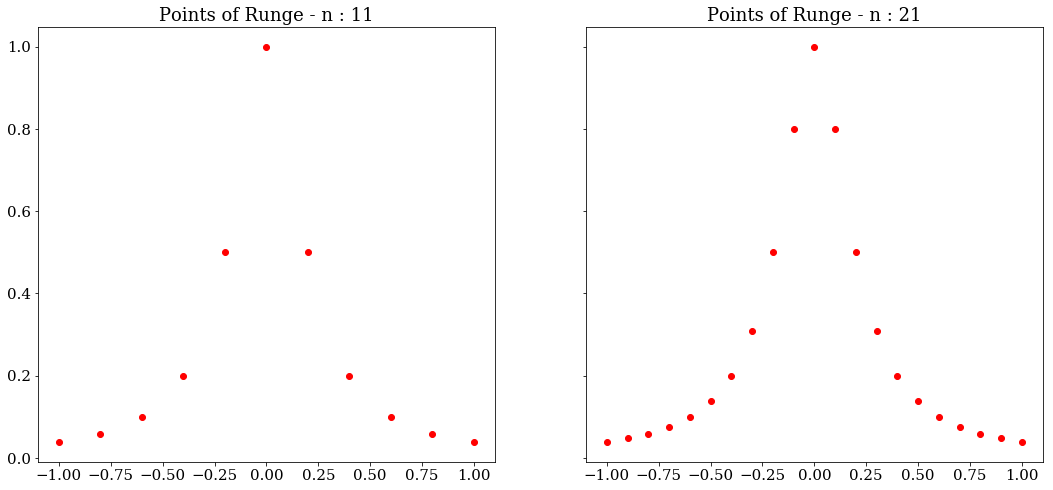

In [2]:
def f(t):
    
    return 1.0 / (1.0 + 25.0 * t ** 2)

n11 = np.linspace(-1.0, 1.0, num = 11)
n21 = np.linspace(-1.0, 1.0, num = 21)

fig, axes = plt.subplots(1, 2, figsize = (18, 8), sharey = True)

axes[0].plot(n11, f(n11), 'ro')
axes[1].plot(n21, f(n21), 'ro')

axes[0].set_title('Points of Runge - n : 11')
axes[1].set_title('Points of Runge - n : 21')

## Linear Interpolation

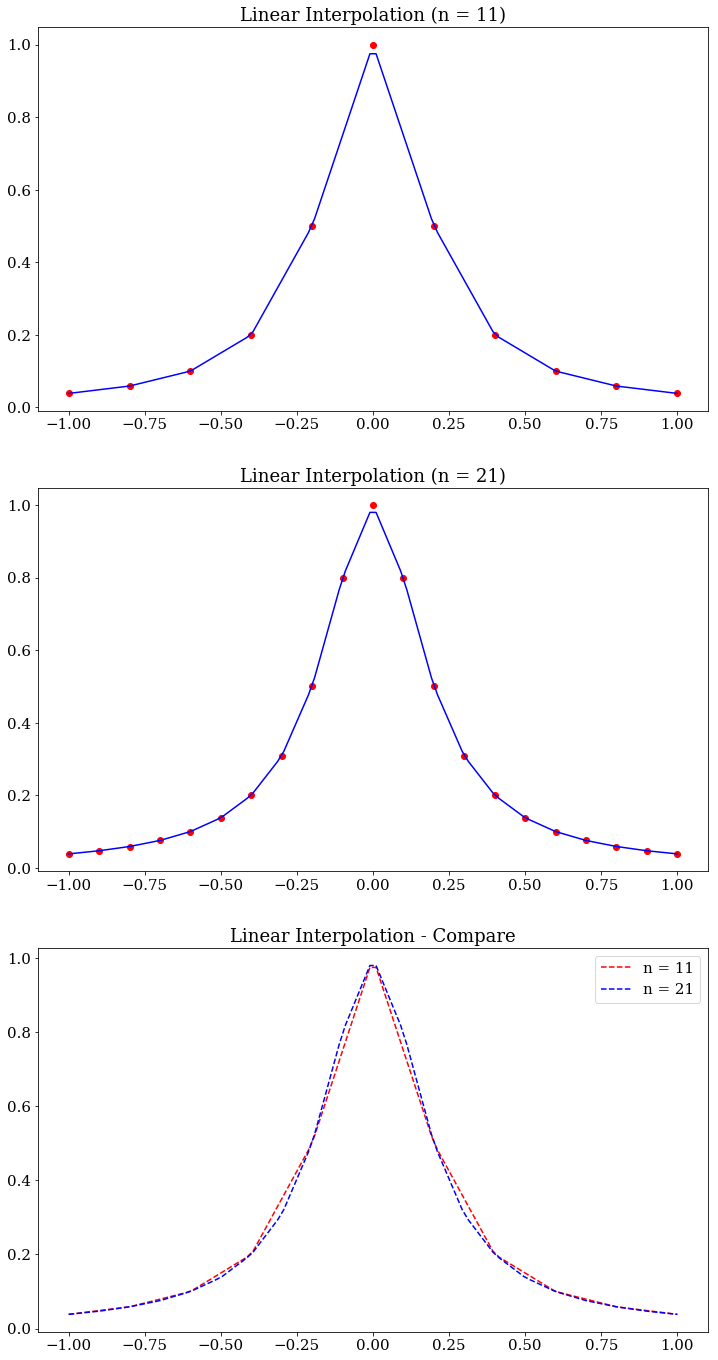

In [3]:
x_interpol = np.linspace(-1.0, 1.0, num = 100)

f_interpol11 = interp1d(n11, f(n11))
f_interpol21 = interp1d(n21, f(n21))

fig, axes = plt.subplots(3, 1, figsize = (12, 24))

axes[0].plot(n11, f(n11), 'ro')
axes[1].plot(n21, f(n21), 'ro')

axes[0].plot(x_interpol, f_interpol11(x_interpol), 'b')
axes[1].plot(x_interpol, f_interpol21(x_interpol), 'b')

axes[2].plot(x_interpol, f_interpol11(x_interpol), 'r--')
axes[2].plot(x_interpol, f_interpol21(x_interpol), 'b--')

axes[2].legend(['n = 11', 'n = 21'])

axes[0].set_title('Linear Interpolation (n = 11)')
axes[1].set_title('Linear Interpolation (n = 21)')
axes[2].set_title('Linear Interpolation - Compare')

## Polynomial Interpolation

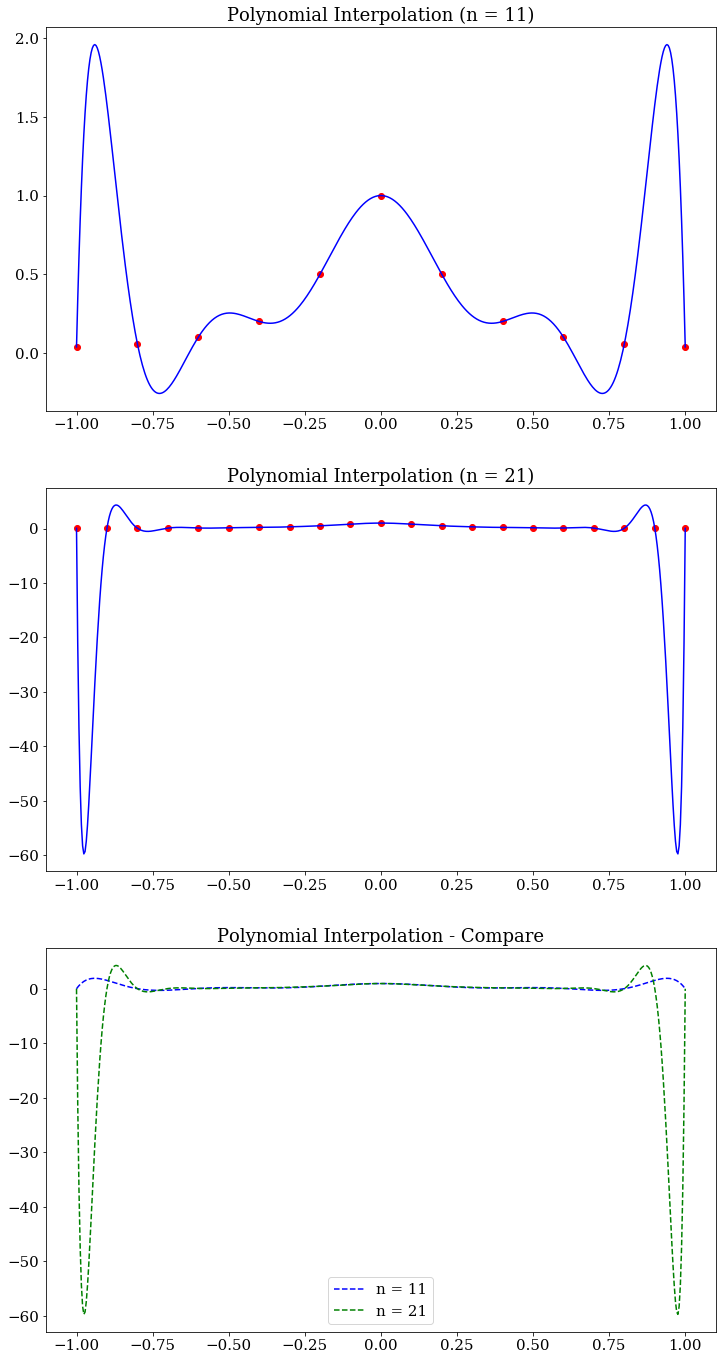

In [4]:
x_interpol = np.linspace(-1.0, 1.0, num = 500)

f_interpol11_poly = BarycentricInterpolator(n11, f(n11))
f_interpol21_poly = BarycentricInterpolator(n21, f(n21))

fig, axes = plt.subplots(3, 1, figsize = (12, 24))

axes[0].plot(n11, f(n11), 'ro')
axes[1].plot(n21, f(n21), 'ro')

axes[0].plot(x_interpol, f_interpol11_poly(x_interpol), 'b')
axes[1].plot(x_interpol, f_interpol21_poly(x_interpol), 'b')

axes[2].plot(x_interpol, f_interpol11_poly(x_interpol), 'b--')
axes[2].plot(x_interpol, f_interpol21_poly(x_interpol), 'g--')

axes[2].legend(['n = 11', 'n = 21'])

axes[0].set_title('Polynomial Interpolation (n = 11)')
axes[1].set_title('Polynomial Interpolation (n = 21)')
axes[2].set_title('Polynomial Interpolation - Compare')

## Cubic Spline

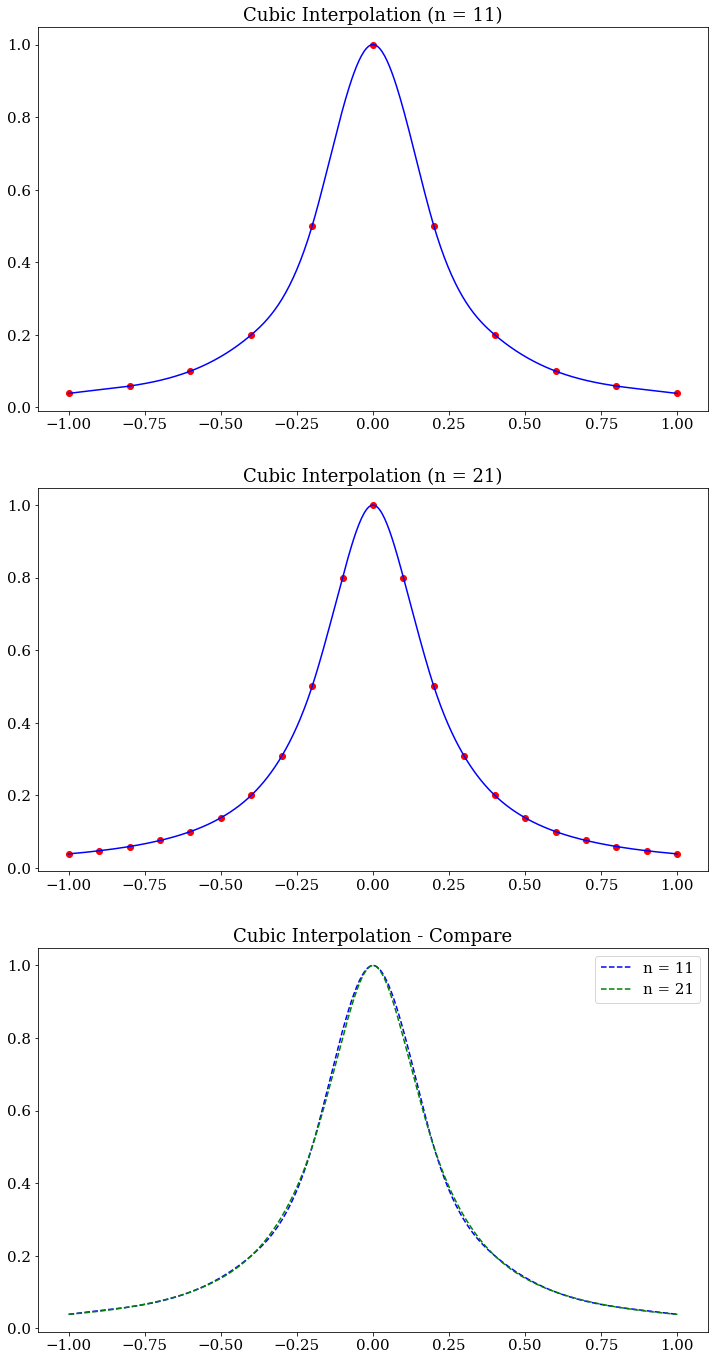

In [5]:
x_interpol = np.linspace(-1.0, 1.0, num = 500)

f_interpol11_cubic = CubicSpline(n11, f(n11))
f_interpol21_cubic = CubicSpline(n21, f(n21))

fig, axes = plt.subplots(3, 1, figsize = (12, 24))

axes[0].plot(n11, f(n11), 'ro')
axes[1].plot(n21, f(n21), 'ro')

axes[0].plot(x_interpol, f_interpol11_cubic(x_interpol), 'b')
axes[1].plot(x_interpol, f_interpol21_cubic(x_interpol), 'b')

axes[2].plot(x_interpol, f_interpol11_cubic(x_interpol), 'b--')
axes[2].plot(x_interpol, f_interpol21_cubic(x_interpol), 'g--')

axes[2].legend(['n = 11', 'n = 21'])

axes[0].set_title('Cubic Interpolation (n = 11)')
axes[1].set_title('Cubic Interpolation (n = 21)')
axes[2].set_title('Cubic Interpolation - Compare')

## Comparison

$t = 0$ 인 중심에서 Polynomial Interpolation 과 Cubic Spline 모두 좋은 결과를 보여주었다.<br>
하지만 Polynomial Interpolation 은 중심에서 멀어질수록 진동하며 오차가 커지기 시작하였고, 특히 양 끝단에서 매우 큰 오차를 보여주었다.<br>
Cubic Spline 은 그런 문제 없이 모든 구간에서 안정적으로 Interpolation 을 하였다.<br>
실제 Runge's Function 의 그래프와 비교하였을 때, $n = 21$ 인 Cubic Spline 이 가장 비슷한 그래프를 만들어 내었다.

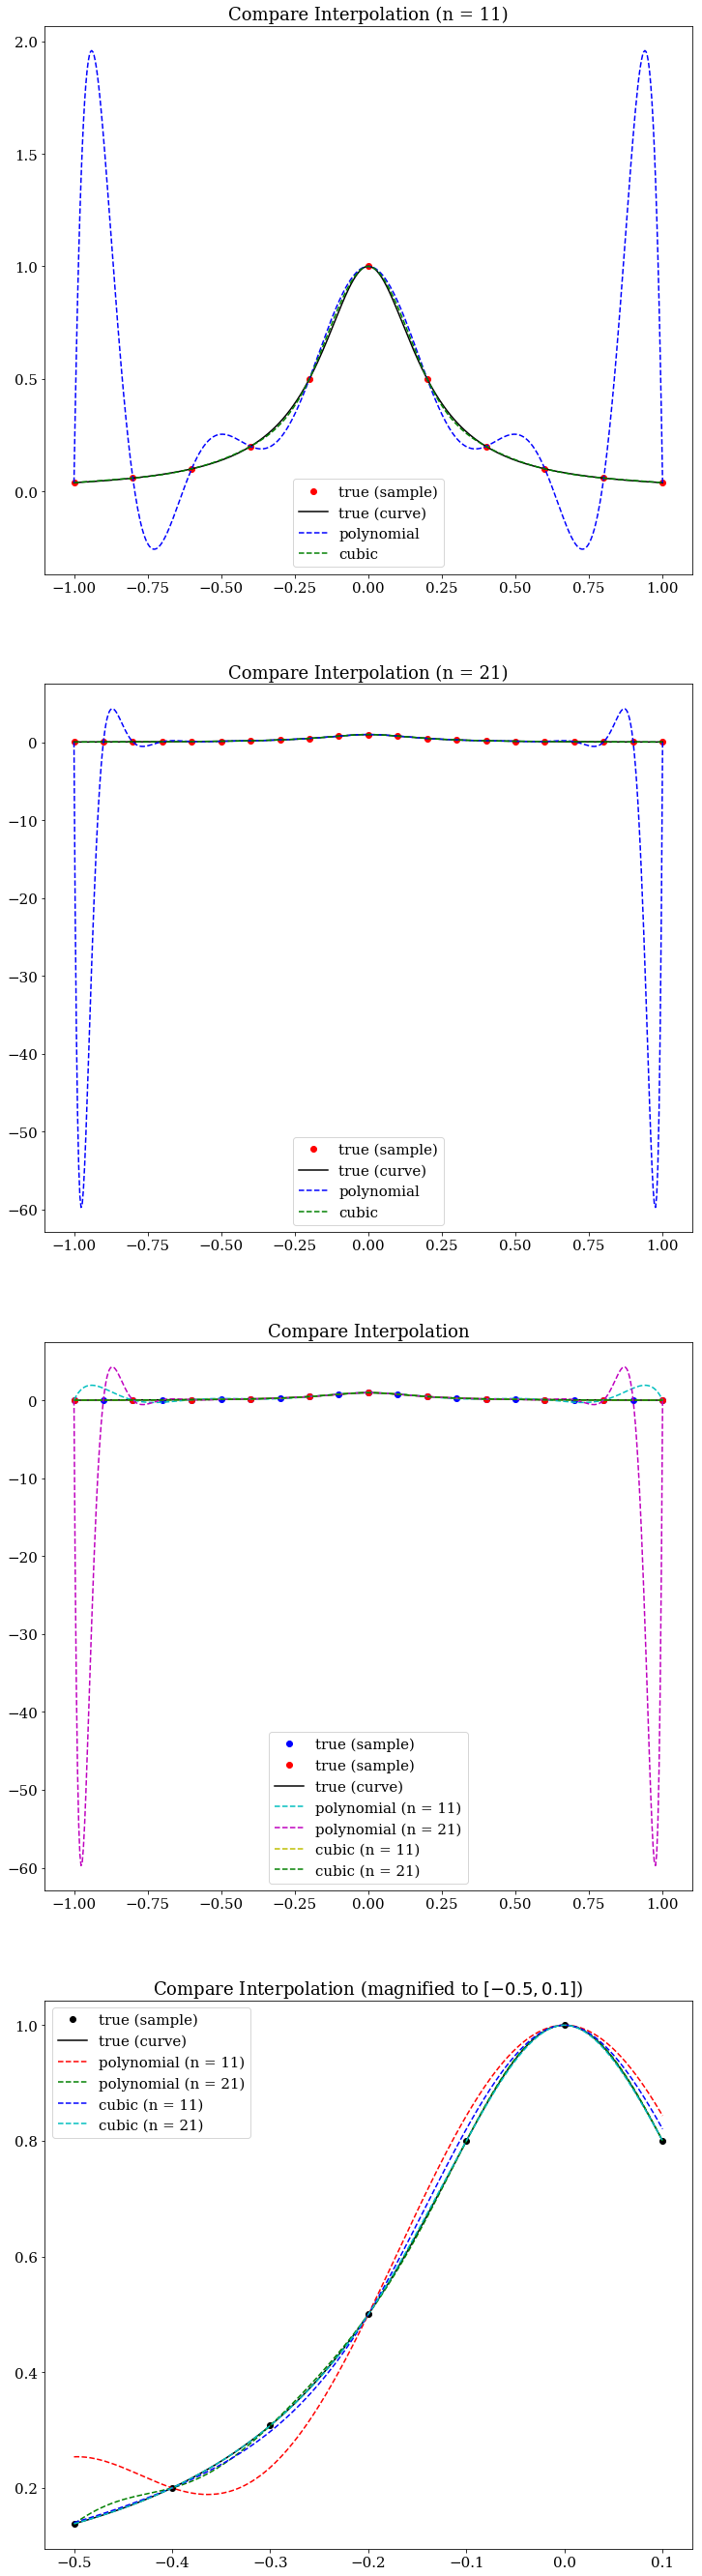

In [6]:
n21_mag = np.linspace(-0.5, 0.1, num = 7)
true_mag = np.linspace(-0.5, 0.1, num = 500)

x_interpol = np.linspace(-1.0, 1.0, num = 500)
x_interpol_mag = np.linspace(-0.5, 0.1, num = 500)

f_interpol11_cubic = CubicSpline(n11, f(n11))
f_interpol21_cubic = CubicSpline(n21, f(n21))


f_interpol11_poly = BarycentricInterpolator(n11, f(n11))
f_interpol21_poly = BarycentricInterpolator(n21, f(n21))

fig, axes = plt.subplots(4, 1, figsize = (12, 48))

axes[0].plot(n11, f(n11), 'ro')
axes[1].plot(n21, f(n21), 'ro')
axes[2].plot(n21, f(n21), 'bo')
axes[2].plot(n11, f(n11), 'ro')
axes[3].plot(n21_mag, f(n21_mag), 'ko')

axes[0].plot(x_interpol, f(x_interpol), 'k-')
axes[1].plot(x_interpol, f(x_interpol), 'k-')
axes[2].plot(x_interpol, f(x_interpol), 'k-')
axes[3].plot(true_mag, f(true_mag), 'k-')

axes[0].plot(x_interpol, f_interpol11_poly(x_interpol), 'b--')
axes[1].plot(x_interpol, f_interpol21_poly(x_interpol), 'b--')
axes[0].plot(x_interpol, f_interpol11_cubic(x_interpol), 'g--')
axes[1].plot(x_interpol, f_interpol21_cubic(x_interpol), 'g--')

axes[2].plot(x_interpol, f_interpol11_poly(x_interpol), 'c--')
axes[2].plot(x_interpol, f_interpol21_poly(x_interpol), 'm--')
axes[2].plot(x_interpol, f_interpol11_cubic(x_interpol), 'y--')
axes[2].plot(x_interpol, f_interpol21_cubic(x_interpol), 'g--')

axes[3].plot(x_interpol_mag, f_interpol11_poly(x_interpol_mag), 'r--')
axes[3].plot(x_interpol_mag, f_interpol21_poly(x_interpol_mag), 'g--')
axes[3].plot(x_interpol_mag, f_interpol11_cubic(x_interpol_mag), 'b--')
axes[3].plot(x_interpol_mag, f_interpol21_cubic(x_interpol_mag), 'c--')

axes[0].legend(['true (sample)', 'true (curve)', 'polynomial', 'cubic'], loc = 'best')
axes[1].legend(['true (sample)', 'true (curve)', 'polynomial', 'cubic'], loc = 'best')
axes[2].legend(['true (sample)', 'true (sample)', 'true (curve)', 'polynomial (n = 11)', 'polynomial (n = 21)', 'cubic (n = 11)', 'cubic (n = 21)'], loc = 'best')
axes[3].legend(['true (sample)', 'true (curve)', 'polynomial (n = 11)', 'polynomial (n = 21)', 'cubic (n = 11)', 'cubic (n = 21)'], loc = 'best')

axes[0].set_title('Compare Interpolation (n = 11)')
axes[1].set_title('Compare Interpolation (n = 21)')
axes[2].set_title('Compare Interpolation')
axes[3].set_title('Compare Interpolation (magnified to $[-0.5, 0.1]$)')